<a href="https://colab.research.google.com/github/Blutronics/BakeryAssociationRule/blob/main/bakery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df=pd.read_csv('Bakery.csv')
df.head()

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,2016-10-30 09:58:11,Morning,Weekend
1,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
2,2,Scandinavian,2016-10-30 10:05:34,Morning,Weekend
3,3,Hot chocolate,2016-10-30 10:07:57,Morning,Weekend
4,3,Jam,2016-10-30 10:07:57,Morning,Weekend


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionNo  20507 non-null  int64 
 1   Items          20507 non-null  object
 2   DateTime       20507 non-null  object
 3   Daypart        20507 non-null  object
 4   DayType        20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [48]:
df.isnull().sum()

TransactionNo    0
Items            0
DateTime         0
Daypart          0
DayType          0
dtype: int64

In [49]:
dfti=df[['TransactionNo','Items']]
dfti.head()

,TransactionNo,Items
0,1,Bread
1,2,Scandinavian
2,2,Scandinavian
3,3,Hot chocolate
4,3,Jam


In [50]:
dfti.TransactionNo.groupby(dfti.Items)

In [51]:
#dfti=pd.get_dummies(dfti,drop_first=True)
dfti.head()

,TransactionNo,Items
0,1,Bread
1,2,Scandinavian
2,2,Scandinavian
3,3,Hot chocolate
4,3,Jam


In [52]:
items=[]
for i in dfti.groupby('TransactionNo')['Items'].apply(list):
    items.append(i)
#items

In [53]:
all_items=[i for item in items for i in item]
#all_items


In [54]:
from collections import Counter

In [55]:
item_frequencies=Counter(all_items)
#item_frequencies

In [56]:
item_frequencies=sorted(item_frequencies.items(),key=lambda x:x[1])
#item_frequencies

In [57]:
itemfreqs=list(reversed([i[1] for i in item_frequencies]))
item=list(reversed([i[0] for i in item_frequencies]))
itemfreqs[0:12]

[5471, 3325, 1435, 1025, 856, 771, 616, 590, 540, 379, 374, 370]

In [58]:
import matplotlib.pyplot as plt

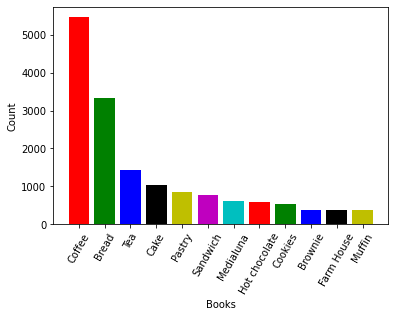

In [59]:
plt.bar(height = itemfreqs[0:12], x = list(range(0, 12)), color = list('rgbkymc'))
plt.xticks(list(range(0, 12), ), item[0:12],rotation=60)
plt.xlabel("Books")
plt.ylabel("Count")
plt.show()

In [60]:
item_series=pd.DataFrame(pd.Series(items))
item_series=item_series.iloc[:1579,:]
item_series

,0
0,[Bread]
1,"[Scandinavian, Scandinavian]"
2,"[Hot chocolate, Jam, Cookies]"
3,[Muffin]
4,"[Coffee, Pastry, Bread]"
...,...
1574,[Farm House]
1575,"[Bread, Soup, Alfajores]"
1576,"[Coke, Coffee, Medialuna, Cake]"
1577,"[Scandinavian, Alfajores, Alfajores]"


In [61]:
item_series.columns=["transactions"]

In [62]:
X=item_series["transactions"].str.join(sep='*').str.get_dummies(sep='*')
X

,Adjustment,Alfajores,Art Tray,Bacon,Basket,Bowl Nic Pitt,Bread,Bread Pudding,Brownie,Cake,...,Scandinavian,Siblings,Smoothies,Soup,Spread,Tartine,Tea,The BART,Truffles,Victorian Sponge
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1574,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1575,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1576,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1577,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [63]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets=apriori(X, min_support=0.01, max_len=4, use_colnames=True)

In [64]:
frequent_itemsets.sort_values('support',ascending=False,inplace=True)

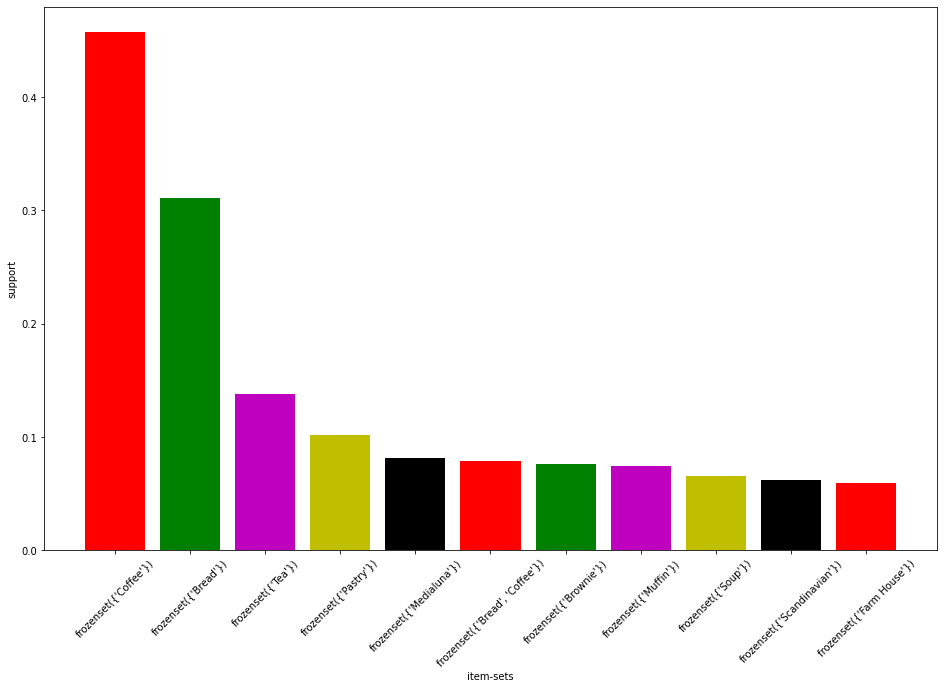

In [65]:
plt.figure(figsize=(16, 10))
plt.bar(x = list(range(0, 11)), height = frequent_itemsets.support[0:11], color =list('rgmyk'))
plt.xticks(list(range(0, 11)), frequent_itemsets.itemsets[0:11], rotation=45)
plt.xlabel('item-sets')
plt.ylabel('support')
plt.show()

In [66]:
rules=association_rules(frequent_itemsets,metric="lift",min_threshold=1)
rules.head(20)
rules.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
33,"(Bread, Coffee)",(Medialuna),0.078531,0.081697,0.013300,0.169355,2.072956,0.006884,1.105529
34,(Medialuna),"(Bread, Coffee)",0.081697,0.078531,0.013300,0.162791,2.072956,0.006884,1.100644
22,(Pastry),(Medialuna),0.101963,0.081697,0.017099,0.167702,2.052723,0.008769,1.103334
23,(Medialuna),(Pastry),0.081697,0.101963,0.017099,0.209302,2.052723,0.008769,1.135752
42,(Sandwich),(Tea),0.038632,0.138062,0.010133,0.262295,1.899835,0.004799,1.168405
43,(Tea),(Sandwich),0.138062,0.038632,0.010133,0.073394,1.899835,0.004799,1.037516
29,(Soup),(Tea),0.065231,0.138062,0.015199,0.233010,1.687717,0.006194,1.123792
28,(Tea),(Soup),0.138062,0.065231,0.015199,0.110092,1.687717,0.006194,1.050410
30,(Keeping It Local),(Coffee),0.018999,0.457251,0.014566,0.766667,1.676685,0.005879,2.326065
31,(Coffee),(Keeping It Local),0.457251,0.018999,0.014566,0.031856,1.676685,0.005879,1.013280
